In [3]:
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import pandas

In [55]:
sys.path.append("../")

# Import Data

In [38]:
satisfiable_outputs = pandas.read_csv("raw_results/outputSatisfiable.csv", header=None, sep=" ")
unsatisfiable_outputs = pandas.read_csv("raw_results/outputUnSatisfiable.csv", header=None, sep=" ")
timeout_outputs = pandas.read_csv("raw_results/outputUnSatisfiableTimeout.csv", header=None, sep=" ")

In [39]:
satisfiable_outputs

,0,1,2,3,4,5,6,7,8,9,10
0,models\auto.mzn,toy,6,8,10,9,"[5, 5]",2,NaN,NaN,NaN
1,models\auto.mzn,toy,10,10,5,4,[5],2,NaN,NaN,NaN
2,models\auto.mzn,toy,12,6,5,4,[5],2,NaN,NaN,NaN
3,models\auto.mzn,toy,16,4,5,4,[5],2,NaN,NaN,NaN
4,models\auto.mzn,toy,16,4,10,9,"[5, 5]",2,NaN,NaN,NaN


# Formatting headers

In [31]:
satisfiable_outputs.columns = ["model name", "data_name", "n_periods", "n_venues", "n_teams", "n_coaches", 
                               "n_teams_per_division", "break_duration", "time", "node", "nogood"]
unsatisfiable_outputs.columns = ["model name", "data_name", "n_periods", "n_venues", "n_teams", "n_coaches", 
                               "n_teams_per_division", "break_duration"]

In [32]:
timeout_outputs = timeout_outputs.loc[:, :7]
timeout_outputs.columns = ["model name", "data_name", "n_periods", "n_venues", "n_teams", "n_coaches", 
                               "n_teams_per_division", "break_duration"]

In [37]:
satisfiable_outputs

,model name,data_name,n_periods,n_venues,n_teams,n_coaches,n_teams_per_division,break_duration,time,node,nogood
0,models\auto.mzn,toy,6,8,10,9,"[5, 5]",2,NaN,NaN,NaN
1,models\auto.mzn,toy,10,10,5,4,[5],2,NaN,NaN,NaN
2,models\auto.mzn,toy,12,6,5,4,[5],2,NaN,NaN,NaN
3,models\auto.mzn,toy,16,4,5,4,[5],2,NaN,NaN,NaN
4,models\auto.mzn,toy,16,4,10,9,"[5, 5]",2,NaN,NaN,NaN


In [ ]:
les colonnes pour insatisfiable : model name n_periods n_venues n_teams n_coaches "n_teams_per_division" break_duration]

# Performances by Complexity

In [96]:
results = pandas.read_csv(
    "/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/test_all_models_80_scenarios_run_2/satisfiable.out",
    header=None, sep=";")


In [97]:
results.columns = ["model_name", "n_teams", "n_periods", "n_divisions",
                  "n_venues", "n_coaches", "time", "nodes", "nogoods"]
results

,model_name,n_teams,n_periods,n_divisions,n_venues,n_coaches,time,nodes,nogoods
0,model_alldiff_regular,5,10,1,4,5,0.285,4530,2405
1,model_alldiff_regular,10,20,2,4,10,0.389,5438,435
2,model_alldiff_regular,15,30,3,4,15,0.765,12639,511
3,model_alldiff_regular,20,40,4,4,20,1.995,23163,823
4,model_alldiff_regular,25,50,5,4,25,4.089,32644,946
5,model_alldiff_regular,30,60,6,4,30,7.153,57611,1326
6,model_alldiff_regular,35,70,7,4,35,9.936,58758,1125
7,model_alldiff_regular,40,80,8,4,40,14.716,84301,1397
8,model_alldiff_regular,45,90,9,4,45,24.222,106446,1245
9,model_alldiff_regular,50,100,10,4,50,32.148,135585,2035


In [98]:
import seaborn as sn
import matplotlib.pyplot as plt

In [99]:
sn.set_style("darkgrid")

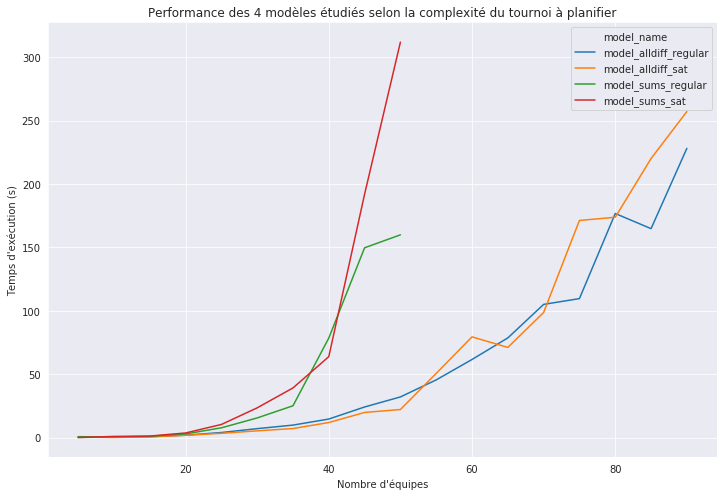

In [100]:
fig, ax = plt.subplots(1, figsize=(12, 8))

sn.lineplot(
    x="n_teams",
    y="time",
    hue="model_name",
    data=results
).set_title("Performance des 4 modèles étudiés selon la complexité du tournoi à planifier")

ax.set_xlabel("Nombre d'équipes")
ax.set_ylabel("Temps d'exécution (s)")

plt.savefig("/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/performance_results.png")

# Breaks Analysis

In [83]:
results = pandas.read_csv(
    "/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/test_scenario_breaks/satisfiable.out",
    header=None, sep=";")

,0,1,2,3
0,model_alldiff_regular_breaks_b01.mzn,28.090,132486,1543
1,model_alldiff_regular_breaks_b02.mzn,28.939,143639,1809
2,model_alldiff_regular_breaks_b03.mzn,24.091,131333,1523
3,model_alldiff_regular_breaks_b04.mzn,22.244,121439,1328
4,model_alldiff_regular_breaks_b05.mzn,27.191,131007,1585
5,model_alldiff_regular_breaks_b06.mzn,30.866,174224,2983
6,model_alldiff_regular_breaks_b07.mzn,29.811,164258,2512
7,model_alldiff_regular_breaks_b08.mzn,28.778,158917,2672
8,model_alldiff_regular_breaks_b09.mzn,288.635,1326256,54059
9,model_alldiff_regular_breaks_b10.mzn,431.541,2025434,94678


In [84]:
results.columns = ["model_name", "time", "nodes", "nogoods"]
results["n_breaks"] = list(range(1, 11))
results

,model_name,time,nodes,nogoods,n_breaks
0,model_alldiff_regular_breaks_b01.mzn,28.090,132486,1543,1
1,model_alldiff_regular_breaks_b02.mzn,28.939,143639,1809,2
2,model_alldiff_regular_breaks_b03.mzn,24.091,131333,1523,3
3,model_alldiff_regular_breaks_b04.mzn,22.244,121439,1328,4
4,model_alldiff_regular_breaks_b05.mzn,27.191,131007,1585,5
5,model_alldiff_regular_breaks_b06.mzn,30.866,174224,2983,6
6,model_alldiff_regular_breaks_b07.mzn,29.811,164258,2512,7
7,model_alldiff_regular_breaks_b08.mzn,28.778,158917,2672,8
8,model_alldiff_regular_breaks_b09.mzn,288.635,1326256,54059,9
9,model_alldiff_regular_breaks_b10.mzn,431.541,2025434,94678,10


In [85]:
import seaborn as sn
import matplotlib.pyplot as plt

In [86]:
sn.set_style("darkgrid")

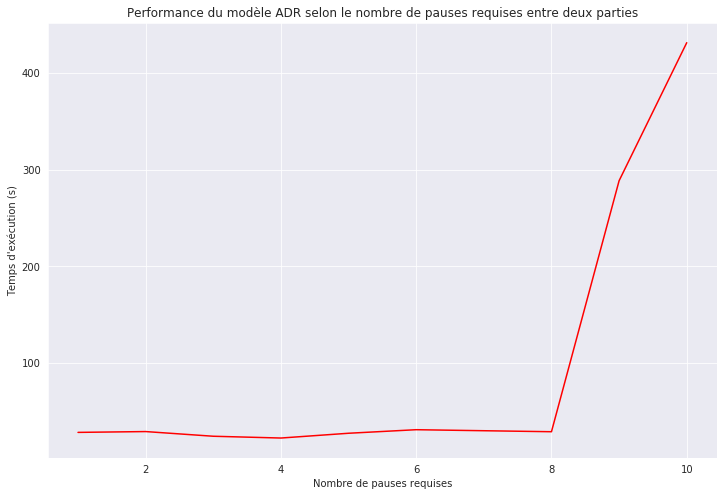

In [88]:
fig, ax = plt.subplots(1, figsize=(12, 8))

sn.lineplot(
    x="n_breaks",
    y="time",
    data=results,
    color="red"
).set_title("Performance du modèle ADR selon le nombre de pauses requises entre deux parties")

ax.set_xlabel("Nombre de pauses requises")
ax.set_ylabel("Temps d'exécution (s)")

plt.savefig("/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/breaks_results.png")

# Coaches Analysis

In [91]:
results = pandas.read_csv(
    "/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/test_scenario_50_teams_40-50_coaches/satisfiable.out",
    header=None, sep=";")

In [92]:
results.columns = ["model_name", "n_teams", "n_periods", "n_divisions",
                  "n_venues", "n_coaches", "time", "nodes", "nogoods"]
results

,model_name,n_teams,n_periods,n_divisions,n_venues,n_coaches,time,nodes,nogoods
0,model_alldiff_regular,50,100,10,4,40,42.223,105637,1567
1,model_alldiff_regular,50,100,10,4,41,34.556,100274,1483
2,model_alldiff_regular,50,100,10,4,42,39.507,103871,1328
3,model_alldiff_regular,50,100,10,4,43,52.833,143567,2079
4,model_alldiff_regular,50,100,10,4,44,40.855,113939,1548
5,model_alldiff_regular,50,100,10,4,45,49.208,135870,1916
6,model_alldiff_regular,50,100,10,4,46,50.894,124519,3077
7,model_alldiff_regular,50,100,10,4,47,43.261,121815,1418
8,model_alldiff_regular,50,100,10,4,48,34.989,106288,1373
9,model_alldiff_regular,50,100,10,4,49,46.615,134191,2007


In [93]:
import seaborn as sn
import matplotlib.pyplot as plt

In [94]:
sn.set_style("darkgrid")

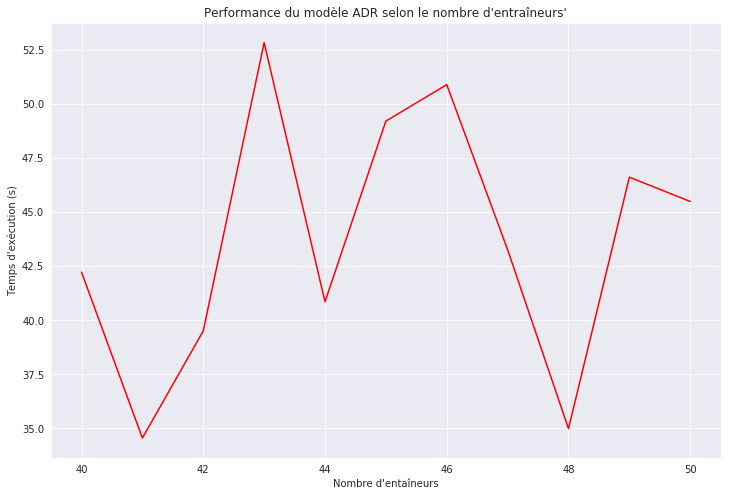

In [95]:
fig, ax = plt.subplots(1, figsize=(12, 8))

sn.lineplot(
    x="n_coaches",
    y="time",
    data=results,
    color="red"
).set_title("Performance du modèle ADR selon le nombre d'entraîneurs'")

ax.set_xlabel("Nombre d'entaîneurs")
ax.set_ylabel("Temps d'exécution (s)")

plt.savefig("/Users/Samuel_Levesque/Documents/GitHub/Projet_IFT7020/results/coaches_results.png")